# Colors

**In this lecture, we will learn**
- what light is,
- how it is perceived by human eye,
- basics of colorimetry,
- what a color space is,
- most common color spaces and their usages,
- how to convert between color spaces,
- difference between linear and nonlinear RGB components.

**This lecture is based on**
- Chapters 13 and 14 of  
  [\[Burger22\] Wilhelm Burger, Mark J. Burge: *Digital Image Processing: An Algorithmic Introduction (3rd edition)*](https://imagingbook.com/books/english-edition-hardcover/)
- [Charles Poynton: *Color FAQ*](https://poynton.ca/notes/colour_and_gamma/ColorFAQ.html)
- [Wikipedia: *CIE 1931 color space*](https://en.wikipedia.org/wiki/CIE_1931_color_space)
- [Yuhao Zhu: *How the CIE 1931 RGB Color Matching Functions Were Developed from the Initial Color Matching Experiments*](https://yuhaozhu.com/blog/cmf.html)
- [Gernot Hoffmann: *CIE Color Space*](http://docs-hoffmann.de/ciexyz29082000.pdf)
- [Chandler Abraham: *A Beginner's Guide to (CIE) Colorimetry*](https://medium.com/hipster-color-science/a-beginners-guide-to-colorimetry-401f1830b65a)
- [Santha Lakshmi Narayana: *Color Science*](https://santhalakshminarayana.github.io/blog/color-science)
- [Kuvina Saydaki: *The Amazing Math Behind Colors!*](https://www.youtube.com/watch?v=gnUYoQ1pwes)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import skimage

In [2]:
plt.rcParams['figure.constrained_layout.use'] = True
np.set_printoptions(threshold=20, edgeitems=10, linewidth=140, precision=3, suppress=True)

# Physics of color

- Light is an electromagnetic radiation that travels through space as waves at speed $c \approx 3 \cdot 10^8 \cdot m \cdot s^{-1}$ and interacts as photons.
- Electromagnetic waves are described by three properties
  1. **frequency** $f$ in Hertz [Hz],
  2. **wavelength** $\lambda$ in meters [m],
  3. **photon energy** $E$ in Joules [J].
- The relationships between them are
  $$
  f = \frac{c}{\lambda} \qquad f = \frac{E}{h} \qquad E = \frac{h \cdot c}{\lambda}
  $$
  where $h \approx 6.6 \cdot 10^{-32} \cdot J \cdot s$ is the Planck constant.
- Whenever electromagnetic waves travel in a medium with matter, their wavelength is decreased. [[Wikipedia](https://en.wikipedia.org/wiki/Electromagnetic_spectrum)]
- Generally, electromagnetic radiation is classified by wavelength into radio wave, microwave, infrared, visible light, ultraviolet, X-rays and gamma rays. [[Wikipedia](https://en.wikipedia.org/wiki/Electromagnetic_spectrum)]
- The visible light is only a very small part of the spectrum.

<figure class="image">
  <img src="../figures/color_images-em_spectrum.svg" alt="" style="width: 6.4in;"/>
  <figcaption>Source: <a href=https://en.wikipedia.org/wiki/Visible_light_communication>Wikipedia</a></figcaption>
</figure>

# Physiology of color

The human eye with normal vision has two types of photosensitive cells on its retina:
1. **Rods** that are responsible for vision at low light and contribute to perception of low-resolution, black-and-white image,
2. **Cones** that respond to high intensity light and contribute to perception of high-resolution, coloured images.

There are **three kinds of cone cells** that differ by how strongly they respond to light of different wavelenghts.
1. **Short (S)**, having peak spectral sensitivity around 420 nm - 440 nm
2. **Medium (M)**, with the peak around 530 nm - 540 nm
3. **Long (L)**, with the peak around 560 nm - 580 nm

**Note about the cones**
- These are sometimes referred to as blue, green and red cones, respectively.
- This is not accurate, since the cones activate throughout wide ranges of wavelengths and they overlap.
- For example, the peak of the L cone (supposedly "red") is around 570 nm, which our eyes actually perceive as yellow.

<figure class="image">
  <img src="../figures/color_images-cones_smj2_e.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Normalized spectral sensitivity of human cones.
    Source: <a href=https://en.wikipedia.org/wiki/Visible_light_communication>Wikipedia</a>
  </figcaption>
</figure>

- Given the three cone responsivity functions $\bar{l}(\lambda), \bar{m}(\lambda), \bar{s}(\lambda)$, any perceivable color $C$ with spectral power distribution $S(\lambda)$ may be represented as a triplet of tristimulus values $C = (L, M, S)$, where
  $$
  L = \int_0^\infty{S(\lambda) \cdot \bar{l}(\lambda) \cdot \mathrm{d}\lambda}
  \qquad
  M = \int_0^\infty{S(\lambda) \cdot \bar{m}(\lambda) \cdot \mathrm{d}\lambda}
  \qquad
  S = \int_0^\infty{S(\lambda) \cdot \bar{s}(\lambda) \cdot \mathrm{d}\lambda}
  $$
- The space of all possible triplets $(L, M, S)$ is called the [LMS color space](https://en.wikipedia.org/wiki/LMS_color_space).

# Psychology of color (color perception)

- In late 1920s, Guild and Wright (independently) performed a set of color matching experiments on 10 and 7 observers, respectively.
- They had two colored lights
  1. a reference monochromatic light of wavelength $\lambda$
  2. a tri-chromatic light composed of some amounts three primaries R (700 nm), G (546.1 nm) and B (435.8 nm).

<figure class="image">
  <img src="../figures/color_images-color_matching.png" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Color matching experiment setup.
    Source: <a href=https://www.oceanopticsbook.info/view/photometry-and-visibility/chromaticity>Ocean Optics Web Book</a>
  </figcaption>
</figure>

- For every monochromatic wavelength $\lambda$, they (linearly) tuned the primaries' intensities using apertures of varying size until subjects couldn't distinguish the two lights.
- They recorded the *ratio* of the apertures for each $\lambda$. They chose the range of $\lambda$ between approximately 380 nm to 750 nm with steps of 10 nm.

<figure class="image">
  <img src="../figures/color_images-wrights.png" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Chromaticity coefficients of the spectral lights in Guild’s initial experiment.
    Source: <a href=https://yuhaozhu.com/blog/cmf.html>Yuhao Zhu</a>
  </figcaption>
</figure>

- They also matched the three primaries to a reference *white* light. This gave them the relative importance of each primary to the perceived luminance (1.0000, 4.5907, 0.0601 for R, G and B, respectively).

<figure class="image">
  <img src="../figures/color_images-luminosity.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Photopic (black) and scotopic (green) luminous efficiency functions.
    Source: <a href=https://en.wikipedia.org/wiki/Luminous_efficiency_function>Wikipedia</a>
  </figcaption>
</figure>

- By matching total luminance of the primaries to the luminance of the reference light (e.g. how many Watts of each of the primary we need to match 1 Watt of the reference light), they constructed a set of **RGB color matching functions (CMFs)**.

<figure class="image">
  <img src="../figures/color_images-cie1931_rgbcmf.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Normalized spectral sensitivity of human cones.
    Source: <a href=https://en.wikipedia.org/wiki/Visible_light_communication>Wikipedia</a>
  </figcaption>
</figure>

- The curves are normalized to equal area.
- Each triplet $(\bar{r}(\lambda), \bar{g}(\lambda), \bar{b}(\lambda))$ tells us how much of each of the primary lights we need in order to produce the same sensation as a monochromatic light of wavelength $\lambda$.
- The negative values at some wavelengths were achieved by increasing the intensity of the corresponding reference monochromatic light.
- Given these scaled color matching functions, the RGB tristimulus values representative for a color with a spectral power distribution $S(\lambda)$ would then be given by
  $$
  R = \int_0^\infty{S(\lambda) \cdot \bar{r}(\lambda) \cdot \mathrm{d}\lambda}
  \qquad
  G = \int_0^\infty{S(\lambda) \cdot \bar{g}(\lambda) \cdot \mathrm{d}\lambda}
  \qquad
  B = \int_0^\infty{S(\lambda) \cdot \bar{b}(\lambda) \cdot \mathrm{d}\lambda}
  $$
- The tristimulus values $(R, G, B)$ form the basis of the [CIE 1931 RGB color space](https://en.wikipedia.org/wiki/CIE_1931_color_space).

# CIE 1931 XYZ color space

- The negative values in the CIE 1931 RGB color matching functions are not a desriable property of a color space, as it could be impractial to add negative amount of some primary color.
- It turns out that no set of three real world primaries can avoid this problem.
- Moreover, it would be convenient if the color system decoupled luminance (intensity) and chromaticity (color).
- The International Commission on Illumination (CIE) solved both problems in 1931 by proposing the XYZ *imaginary* primaries.
- They are constructed by linearly transforming the CIE RGB space as
  $$
  \begin{bmatrix}
    X \\
    Y \\
    Z
  \end{bmatrix}
  =
  \begin{bmatrix}
      0.49000 & 0.31000 & 0.20000 \\
      0.17697 & 0.81240 & 0.01063 \\
      0.00000 & 0.01000 & 0.99000
  \end{bmatrix}
  \cdot
  \begin{bmatrix}
      R \\
      G \\
      B
  \end{bmatrix}
  $$
- This transformation has the effect that all values in XYZ CMFs are positive, as per the following figures.

<figure class="image">
  <img src="../figures/color_images-xyz2rgb.png" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    2D visualization for RG and XY.
    Source: <a href=http://docs-hoffmann.de/ciexyz29082000.pdf>Gernot Hoffmann: CIE Color Space</a>
  </figcaption>
</figure>

<figure class="image">
  <img src="../figures/color_images-cie_1931_xyz_cmf.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    The CIE XYZ standard observer color matching functions.
    Source: <a href=https://en.wikipedia.org/wiki/Visible_light_communication>Wikipedia</a>
  </figcaption>
</figure>

- Since this is an artificial transformation of the CIE RGB space, the resulting X, Y, Z primaries do not correspond to any existing light.

**Tristimulus values X, Y and Z**
- As with the LMS and RGB color spaces, any human perceivable color with spectral power distribution $S(\lambda)$ can be expressed in XYZ as
  $$
  X = \int_0^\infty{S(\lambda) \cdot \bar{x}(\lambda) \cdot \mathrm{d}\lambda}
  \qquad
  Y = \int_0^\infty{S(\lambda) \cdot \bar{y}(\lambda) \cdot \mathrm{d}\lambda}
  \qquad
  Z = \int_0^\infty{S(\lambda) \cdot \bar{z}(\lambda) \cdot \mathrm{d}\lambda}
  $$
  where
   - **Y** now corresponds to **luminance**, i.e. how bright we perceive the color,
   - **Z** is quasi-equal to blue of CIE RGB,
   - **X** is a mix of the three CIE RGB curves chosen to be nonnegative.
- To this day, CIE XYZ still serves as a basis from which other color spaces are derived.
- The resulting X, Y, Z color matching functions are publicly available for download from CIE  
  https://cie.co.at/datatable/cie-1931-colour-matching-functions-2-degree-observer

## XYZ cone

- Consider following experiment.
- We can sweep along visible wavelengths $\lambda$, thereby creating a monochromatic *pure spectral color* $C(\lambda)$ for each $\lambda$.
- Since each $C(\lambda)$'s spectral power distribution is a Dirac impulse $\delta(\lambda)$, the integrals will be trivial and
  $$
  X = \bar{x}(\lambda)
  \qquad
  Y = \bar{y}(\lambda)
  \qquad
  Z = \bar{z}(\lambda)
  $$
  i.e. each $C(\lambda)$ may be represented directly by the CMF values
  $$
  C(\lambda) = (\bar{r}(\lambda), \bar{g}(\lambda), \bar{b}(\lambda))
  $$
- We can render the triplets $(\bar{r}(\lambda), \bar{g}(\lambda), \bar{b}(\lambda))$ as points in 3D space.
- We can give each point an RGB color calculated by the inverse of the RGB $\rightarrow$ XYZ transformation matrix.

In [3]:
with open('../figures/color_images-xyz_cone.json', 'r') as f:
    fig = pio.from_json(f.read())
fig.show()

- We could construct a line for every possible pair of basic colors.
- Set of all such lines would form a **convex hull** of the XYZ 3D point cloud.
- Every perceivable color by a standard observer lies inside this cone-shaped region.
- Colors outside of the convex hull cannot be perceived by human eye, because it would require to activate one cone type without activating the others and this is not possible due to overlap of their spectral sensitivities.

## CIE xy chromaticity diagram

- In order to represent colors in a more convenient manner in 2D and independently from illumination, CIE proposed **chromaticity** coordinates
  $$
  x = \frac{X}{X+Y+Z}
  \qquad
  y = \frac{Y}{X+Y+Z}
  \qquad
  z = \frac{Z}{X+Y+Z}
  $$
- It is obvious that $x+y+z=1$.
- This equation corresponds to that of a plane in the XYZ space.
- Intersection of the XYZ convex cone and the plane gives rise to the **CIE xy chromaticity diagram**.

<figure class="image">
  <img src="../figures/color_images-spectral_locus_planar_projection.jpg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Intersection of the XYZ convex cone and the plane x+y+z=1.
    Source: <a href=https://santhalakshminarayana.github.io/blog/color-science>Santha Lakshmi Narayana</a>
  </figcaption>
</figure>

<figure class="image">
  <img src="../figures/color_images-cie1931xy_ciergb.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    The CIE xy chromaticity diagram with the CIE RGB gamut and location of its primaries.
    Source: <a href=https://en.wikipedia.org/wiki/CIE_1931_color_space>Wikipedia</a>
  </figcaption>
</figure>

## Properties of the CIE 1931 XYZ color space

- The diagram represents all of the chromaticities visible to the average person.
- These are shown in color and this region is called the gamut of human vision.
- $\textrm{E}$ is the white point.
- Lines passing through $\textrm{E}$ show which colors are opposite in the spectrum, i.e. their weighted combination can result in white (or gray).
- An equal mixture of two equally bright colors will not generally lie on the midpoint of that line segment.
- Since the diagram is not triangle, there can be no three real world sources of light (primaries) that would cover the entire human vision gamut.
- Distance on the CIE xy chromaticity diagram does not correspond to the degree of difference between two colors.

# Other colorimetric color spaces

- Based on connecting the physics (wavelengths) and color perception (CMFs), CIEXYZ unambigously specifies colors to appear identically on any device.
- In principle, any device can be *calibrated* e.g. with respect to the CIEXYZ color space so that it displays the colors as specified by the gamut and perceived by the standard observer.
- This is the essence of **colorimetry**.
- The CIEXYZ/RGB/LMS color spaces are not the only colorimetric color spaces. There are many others, each designed to address different goals.
- Usually, they are connected to CIEXYZ by putting their primaries on the CIE xy chromaticity diagram and by specifying conversion equations.

<figure class="image">
  <img src="../figures/color_images-cie1931xy_gamut_comparison.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    MacAdam ellipses.
    Source: <a href=https://en.wikipedia.org/wiki/MacAdam_ellipse>Wikipedia</a>
  </figcaption>
</figure>

## CIELAB & CIELUV

**CIELAB**
- Also referred to as **L\*a\*b.**
- Developed in 1976 by CIE with the goal linearizing the representation with respect to human color perception.
- In other words, CIE wanted to make a color space in which distances in the gamut correspond to perceived differences in color (this is not the case with CIEXYZ).

<figure class="image">
  <img src="../figures/color_images-ciexy1931_macadam.png" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    MacAdam ellipses. Smalle rellipse means higher eye sensitivity to change in chromaticity.
    Source: <a href=https://en.wikipedia.org/wiki/MacAdam_ellipse>Wikipedia</a>
  </figcaption>
</figure>

**CIELUV**
- Also referred to as **CIE 1976 L\*, u\*, v\* color space**
- A simpler to compute variant.

## Standard RGB (sRGB)

- CIE based color spaces are device independent and have gamuts sufficiently large to represent all visible colors in the CIEXYZ system.
- However, in many display-oriented applications (e.g. graphics or multimedia), they may be too cumbersome or inefficient.
- sRGB was jointly developed by Hewlett-Packard and Microsoft in 1996 and subsequently standardized by CIE in 1999.
- It is precisely anchored to CIEXYZ by specifying primary locations, white point, ambient lighting conditions and gamma values.
- Its gamut is considerably smaller than CIEXYZ so that inexpensive consumer devices are able to conform to it.

<figure class="image">
  <img src="../figures/color_images-srgb_chromaticity_CIE1931.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    sRGB colors situated at calculated position in CIE 1931 chromaticity diagram.
    Source: <a href=https://en.wikipedia.org/wiki/SRGB>Wikipedia</a>
  </figcaption>
</figure>

- sRGB is the current defined standard colorspace for the web, and it is usually the assumed colorspace for images that are neither tagged for a colorspace nor have an embedded color profile [[Wikipedia](https://en.wikipedia.org/wiki/SRGB)].
- In other words, **working with any RGB color data almost always means dealing with sRGB**.

### Transformation sRGB $\leftrightarrow$ CIEXYZ and linear vs nonlinear components

- The IEC specification of sRGB defines a reference display with a nominal gamma of $\gamma \approx 2.2$, which the sRGB working group determined was representative of the CRTs used with Windows operating systems at the time [[Wikipedia](https://en.wikipedia.org/wiki/SRGB)].
- This means that there is a gamma correction function $\Gamma$ that makes the sRGB **nonlinear with respect to CIEXYZ**.
- When loading an sRGB image, **the raw pixel values $R',G',B'$ we get have already been gamma-corrected** by the capturing device before saving as
  $$
  R' = \Gamma(R) \qquad G' = \Gamma(G) \qquad B' = \Gamma(B)
  $$
- We call $R',G',B'$ **nonlinear RGB component values**.
- In order to calculate the original **linear RGB component values** $R,G,B$, we need to do
  $$
  R = \Gamma^{-1}(R') \qquad G = \Gamma^{-1}(G') \qquad B = \Gamma^{-1}(B')
  $$
- The gamma correction function is
  $$
  \Gamma(C) = \begin{cases}
    12.92 \cdot C & \textrm{if} & C \le 0.0031308 \\
    1.055 \cdot C^{1/2.4} - 0.055  & \textrm{if} & C \gt 0.0031308
  \end{cases}
  $$
  and its inverse is
  $$
  \Gamma^{-1}(C') = \begin{cases}
    \frac{C'}{12.92} & \textrm{if} & C' \le 0.04045 \\
    \left( \frac{C' + 0.055}{1.055} \right)^{2.4}  & \textrm{if} & C' \gt 0.04045
  \end{cases}
  $$
- The corresponding **linear** components $R, G, B$ relate to the CIEXYZ by **linear** transformations
  $$
  \begin{bmatrix}
    X \\
    Y \\
    Z
  \end{bmatrix}
  =
  \begin{bmatrix}
      0.4124 & 0.3576 & 0.1805 \\
      0.2126 & 0.7152 & 0.0722 \\
      0.0193 & 0.1192 & 0.9505
  \end{bmatrix}
  \cdot
  \begin{bmatrix}
      R \\
      G \\
      B
  \end{bmatrix}
  $$
  and
  $$
  \begin{bmatrix}
      R \\
      G \\
      B
  \end{bmatrix}
  =
  \begin{bmatrix}
      +3.2406 & -1.5372 & -0.4986 \\
      -0.9689 & +1.8758 & +0.0415 \\
      +0.0557 & -0.2040 & +1.0570 
  \end{bmatrix}
  \cdot
  \begin{bmatrix}
    X \\
    Y \\
    Z
  \end{bmatrix}
  $$

# Acquisition of color

- In principle, there are three strategies of capturing color images
  1. Record three images in succession using a monochromatic camera, for example by switching filter in front of it.
  2. Use a color filter array on a single monochromatic sensor.
  3. Split the incoming light into the three channels using a prism-like device.
- The most common way of acquiring color images is through the use of color filter arrays arranged according to the **Bayer pattern**.

<figure class="image">
  <img src="../figures/color_images-bayer_pattern_on_sensor.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    The Bayer arrangement of color filters.
    Source: <a href=https://en.wikipedia.org/wiki/Bayer_filter>Wikipedia</a>
  </figcaption>
</figure>

<figure class="image">
  <img src="../figures/color_images-bayer_pattern_on_sensor_profile.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Profile/cross-section of sensor.
    Source: <a href=https://en.wikipedia.org/wiki/Bayer_filter>Wikipedia</a>
  </figcaption>
</figure>

- The raw output of Bayer-filter cameras is referred to as a Bayer pattern image.
- Each pixel in Bayer pattern image has only single channel color information.
- This is what your camera will save if you select RAW image format, i.e. the data directly obtained from the sensor array.

**Post-processing**

In order to reconstruct a full RGB image, in which each pixel has three color values, most cameras perform
1. **demosaicing** to interpolate missing color information such that each pixel has three RGB values; most commonly bilinear interpolation is used,
2. **color balancing** to match the white point of the image to pure white; BT.709 specification uses the daylight illuminant D65 as its reference white,
3. **gamma corrrection** to correct for non-linearities in the relationship between voltage accumulated on the sensor and perceived brightness.

# RGB images

## Additive color model

- RGB is an additive color model.
- We start by black and create color by **adding** the primary colors Red (R), Green (G) and Blue (B).
- In other words, every color is expressed as a **weighted summation** of three primary colors.

<figure class="image">
  <img src="../figures/color_images-venn_diagram_rgb.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    A diagram demonstrating additive color with RGB.
    Source: <a href=https://en.wikipedia.org/wiki/RGB_color_model>Wikipedia</a>
  </figcaption>
</figure>

- Real life demonstration  
  https://en.wikipedia.org/wiki/File:Additive_colors.ogv
- The RGB color psace can be visualized as a 3D unit cube in which the three primary colors form the coordinate axes.
- Every possible color $\bold{C}$ corresponds to a point within the RGB color cube as
  $$
  \bold{C} = [R, G, B]^\top
  $$
  where $0 \le R, G, B \le C_\textrm{max}$ and $C_\textrm{max}$ is typically either 1 or 255.

<figure class="image">
  <img src="../figures/color_images-rgb_cube.png" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    RGB cube.
    Source: [Burger22], Fig. 13.1
  </figcaption>
</figure>

## Structure of RGB images

### True color images

- A pixel in a RGB true color image can represent any color in RGB.
- We need to store 3 values per each pixel.
- We may treat the RGB image $f(m,n)$ either as a triple of functions
  $$
  f = (f_\textrm{R}, f_\textrm{G}, f_\textrm{B})
  $$
  each for one of the respective channels,  
  or as a function
  $$
  f: \mathbb{N}^2 \rightarrow \mathbb{R}^3
  $$
  that for each position $(m,n)$ returns a triple of color values $(R, G, B)$ (vector of size 3).

<figure class="image">
  <img src="../figures/color_images-rgb_component_ordering.png" alt="" style="width: 6.4in;"/>
  <figcaption>Source: [Burger22], Fig. 13.3</figcaption>
</figure>

### Indexed images

- We have a list of possible (R,G,B) colors (color table), far smaller than the RGB gamut.
- Every pixel only holds one integer value that is an index into the list.

<figure class="image">
  <img src="../figures/color_images-indexed_rgb.png" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    Indexed RGB image.
    Source: [Burger22], Fig. 13.5
  </figcaption>
</figure>

### RGB images in Python

- We'll use scikit-image to load an RGB image.
- It will return a 3D numpy array.
- It does not matter whether it is full RGB or indexed, the library will always decode/uncompress the image such that we'll have 3 values per pixel.

In [4]:
# Load the image.
rgb = skimage.io.imread('../data/lorikeet.jpg')
rgb.shape, rgb.dtype, rgb.min(), rgb.max()

((1063, 1063, 3), dtype('uint8'), 0, 255)

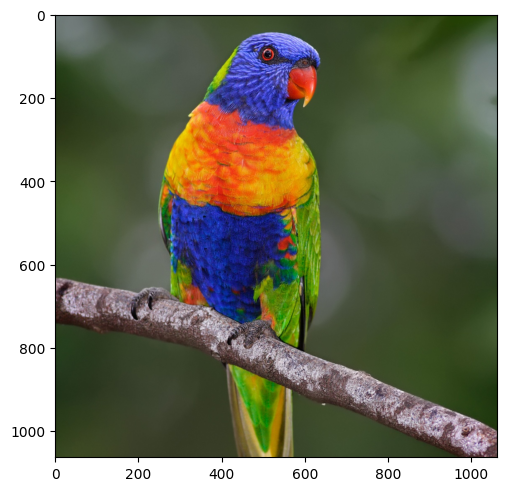

In [5]:
# Show the image.
plt.imshow(rgb);

In [6]:
# Value of pixel at row 10 and column 15
rgb[10, 15]

array([111, 123, 121], dtype=uint8)

In [7]:
# Get the green channel (index 1)
rgb[..., 1]

array([[120, 121, 122, 121, 121, 122, 122, 121, 122, 121, ...,  70,  71,  72,  70,  71,  71,  69,  69,  72,  74],
       [121, 122, 122, 122, 122, 123, 123, 122, 122, 121, ...,  70,  70,  71,  71,  72,  72,  71,  71,  73,  74],
       [120, 121, 122, 122, 122, 122, 122, 121, 122, 121, ...,  71,  71,  72,  71,  72,  73,  72,  72,  74,  74],
       [121, 121, 121, 121, 121, 121, 121, 121, 121, 121, ...,  72,  72,  72,  72,  73,  74,  74,  74,  75,  75],
       [124, 123, 122, 122, 122, 122, 122, 122, 122, 122, ...,  73,  73,  73,  73,  74,  75,  76,  76,  76,  77],
       [124, 123, 122, 122, 122, 122, 122, 123, 122, 122, ...,  75,  75,  75,  75,  76,  77,  78,  78,  78,  78],
       [122, 121, 122, 123, 123, 122, 121, 122, 122, 122, ...,  77,  77,  77,  77,  77,  78,  79,  79,  79,  79],
       [120, 120, 121, 123, 123, 122, 121, 122, 122, 122, ...,  77,  78,  78,  79,  79,  80,  81,  81,  81,  81],
       [122, 122, 122, 122, 122, 122, 122, 122, 121, 122, ...,  77,  77,  78,  79,  80, 

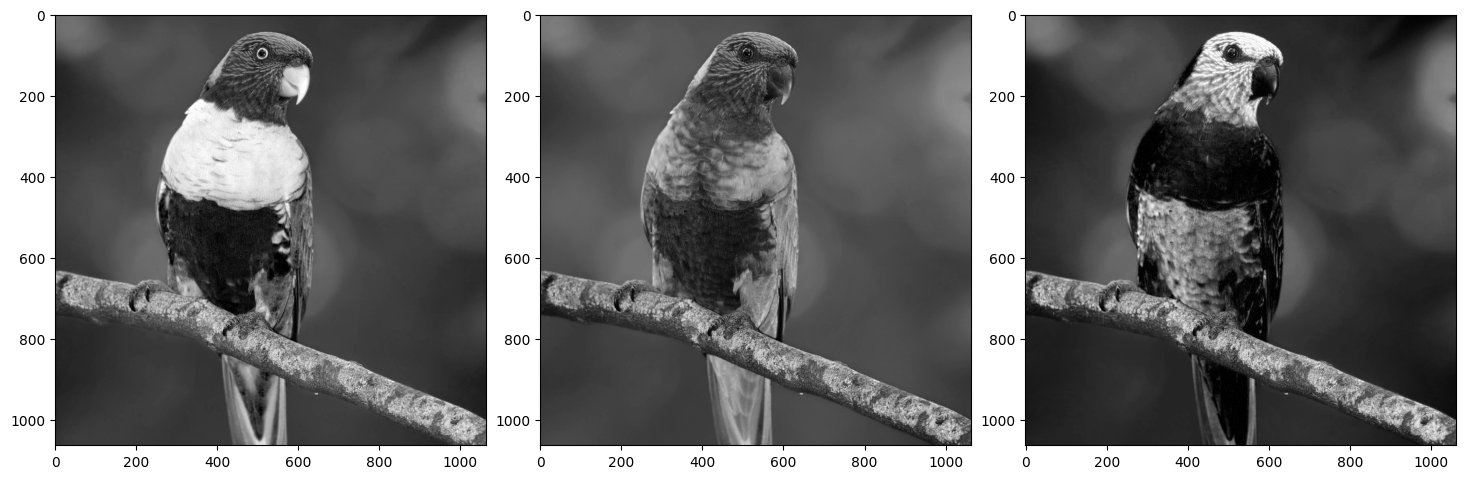

In [8]:
# Display each channel separately
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.33))
axes[0].imshow(rgb[..., 0], cmap='gray', vmin=0, vmax=255);
axes[1].imshow(rgb[..., 1], cmap='gray', vmin=0, vmax=255);
axes[2].imshow(rgb[..., 2], cmap='gray', vmin=0, vmax=255);

# Color spaces and conversion

**Note**
- In the following, we will assume the color values as real values in the range $[0, 1]$.

In [9]:
rgb = skimage.util.img_as_float(rgb)
rgb.shape, rgb.dtype, rgb.min(), rgb.max()

((1063, 1063, 3), dtype('float64'), 0.0, 1.0)

## Conversion RGB $\rightarrow$ Grayscale

**Averaging**
- One of the simplest conversions could be averaging
  $$
  Y' = \frac{R' + G' + B'}{3}
  $$
  where $Y'$ could be called video **luma**, a non-linear approximation to the true luminance $Y$.

**Legacy weighted average**
- However, simple averaging does not reflect the sensitivity of human vision to different colors.
- So, a better conversion if to emphasize the green component using a *weighted* average
  $$
  Y' = w_\textrm{R} \cdot R' + w_\textrm{G} \cdot G' + w_\textrm{B} \cdot B'
  $$
- The most commonly seen values of coefficients $w_\textrm{R}, w_\textrm{G}, w_\textrm{B}$ are
  $$
  w_\textrm{R} = 0.299 \qquad w_\textrm{B} = 0.587 \qquad w_\textrm{B} = 0.114
  $$
- This is what OpenCV or MATLAB use when converting RGB to grayscale.
- The weights are based on video *luma* from PAL, SECAM and NTSC standards developed in 20th century and were accurate for contemporary devices.

**Modern coefficients**
- For modern devices, the newer ITU-R BT.709 standard for HDTV developed by ATSC committee specifies the weights as
  $$
  w_\textrm{R} = 0.2126 \qquad w_\textrm{B} = 0.7152 \qquad w_\textrm{B} = 0.0722
  $$
- Notice that these values are taken from the sRGB $\rightarrow$ CIEXYZ calculation of the *linear* luminance $Y$.
- However, as we'll see below, we usually work with *nonlinear* RGB components.
- So it is important to keep in mind that the calculated $Y'$ isn't the CIEXYZ linear luminance, but something else that is commonly referred to as *luma*.
- The scikit-image library uses these values for RGB to grayscale conversion.

In [10]:
gray_avg = (1. * rgb[..., 0] + 1. * rgb[..., 1] + 1. * rgb[..., 2]) / 3  # averaging
gray_leg = 0.299 * rgb[..., 0] + 0.587 * rgb[..., 1] + 0.114 * rgb[..., 2]  # legacy
gray_mod = 0.2126 * rgb[..., 0] + 0.7152 * rgb[..., 1] + 0.0722 * rgb[..., 2]  # modern

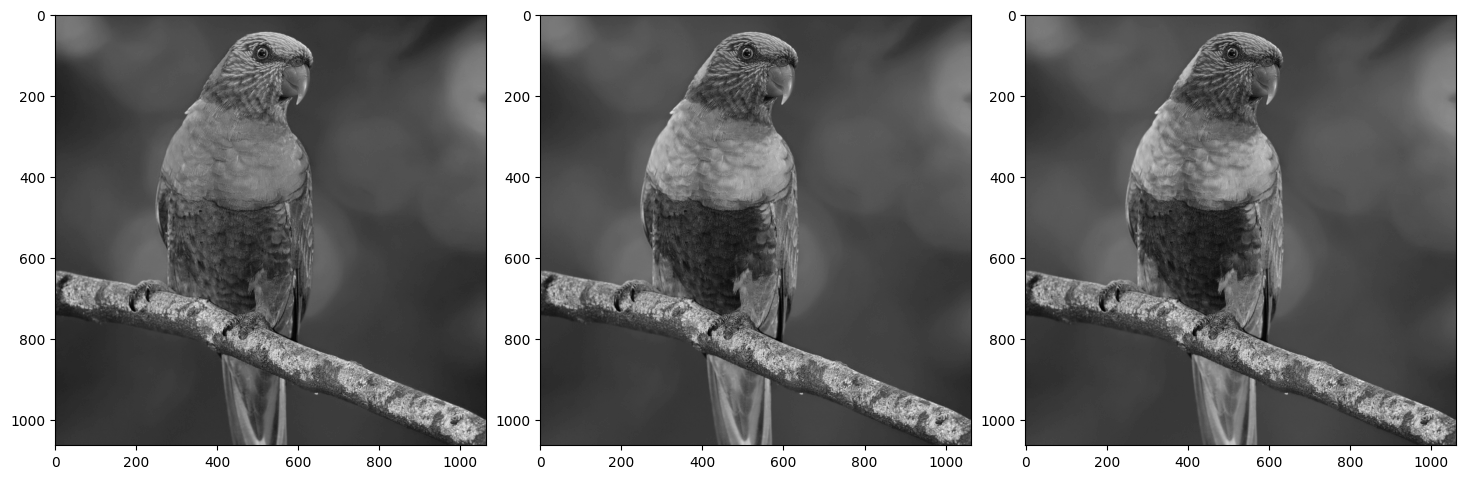

In [11]:
# Display each channel separately
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.33))
axes[0].imshow(gray_avg, cmap='gray', vmin=0, vmax=1);
axes[1].imshow(gray_leg, cmap='gray', vmin=0, vmax=1);
axes[2].imshow(gray_mod, cmap='gray', vmin=0, vmax=1);

### Linear vs nonlinear color components

- Remember that we assume the sRGB color space.
- Remember also that the pixel values have been gamma-corrected using an effective $\gamma \approx 2.2$.
- The equations above for conversion RGB $\rightarrow$ Grayscale are **only appropriate for linear RGB components**.
- In other words, the **correct thing to do** would be to
  1. restore the original *linear RGB values* $R,G,B$ by $C = \Gamma^{-1}(C')$
  2. perform RGB $\rightarrow$ Grayscale on $R,G,B$,
  3. gamma-correct using $Y' = \Gamma(Y)$ to get back the *nonlinear luma value* $Y'$ that will be correctly displayed.
- In practice, this is often omitted and the conversion is performed directly on the nonlinear values.
- So, we have the following methods of RGB $\rightarrow$ gray conversion
  1. Averaging *nonlinear* components,
  2. Convert *nonlinear* components using the *legacy* weights,
  3. Convert *nonlinear* components using the *modern* weights,
  4. Convert *linearized* components using the *CIEXYZ* weights,
  5. Approximate linearized conversion on *nonlinear* components using appropriate weights $w_\textrm{R} = 0.309, w_\textrm{G} = 0.609, w_\textrm{B} = 0.082$.

In [12]:
def srgb_gamma_inv(img: np.ndarray) -> np.ndarray:
    mask = img > 0.04045
    out = img.copy()
    out[~mask] /= 12.92
    out[mask] = ((out[mask] + 0.055) / 1.055) ** 2.4
    return out

In [13]:
def srgb_gamma(img: np.ndarray) -> np.ndarray:
    mask = img > 0.0031308
    out = img.copy()
    out[~mask] *= 12.92
    out[mask] = 1.055 * out[mask] ** (1/2.4) - 0.055
    return out

In [14]:
def rgb2gray(rgb: np.ndarray, method: str = 'exact') -> np.ndarray:
    if method == 'average':
        gray = 1./3. * rgb[..., 0] + 1./3. * rgb[..., 1] + 1./3. * rgb[..., 2]
    elif method == 'legacy':
        gray = 0.299 * rgb[..., 0] + 0.587 * rgb[..., 1] + 0.114 * rgb[..., 2]
    elif method == 'modern':
        gray = 0.2126 * rgb[..., 0] + 0.7152 * rgb[..., 1] + 0.0722 * rgb[..., 2]
    elif method == 'exact':
        rgb_lin = srgb_gamma_inv(rgb)  # linear R, G, B components
        luminance_f = 0.2126 * rgb_lin[..., 0] + 0.7152 * rgb_lin[..., 1] + 0.0722 * rgb_lin[..., 2]  # CIEXYZ linear Y
        gray = srgb_gamma(luminance_f)  # nonlinear (gamma-corrected Y')
    elif method == 'approximate':
        gray = 0.309 * rgb[..., 0] + 0.609 * rgb[..., 1] + 0.082 * rgb[..., 2]
    return gray

In [15]:
grays = {method: rgb2gray(rgb, method=method) for method in ('exact', 'average', 'legacy', 'modern', 'approximate')}

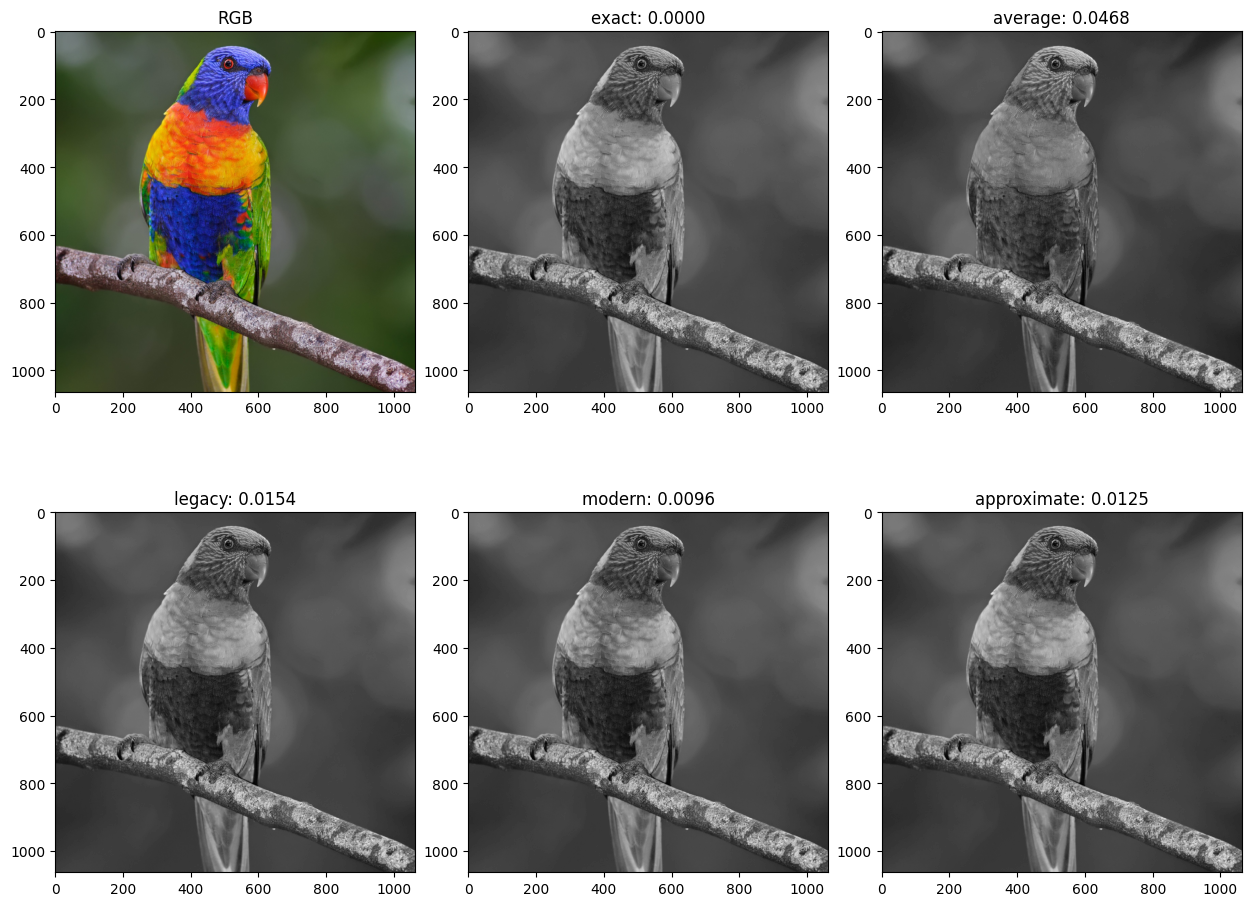

In [16]:
# We can see that for this particular image, the modern conversion is the most accurate (assuming 'exact' as the correct values)
fig, axes = plt.subplots(2, 3, figsize=(12.4, 9.6))
axes[0, 0].imshow(rgb)
axes[0, 0].set_title('RGB')
for ax, (method, lumas) in zip(axes.flat[1:], grays.items()):
    ax.imshow(lumas, cmap='gray', vmin=0, vmax=1);
    ax.set_title(f"{method}: {np.mean(np.abs(lumas - grays['exact'])):.4f}")

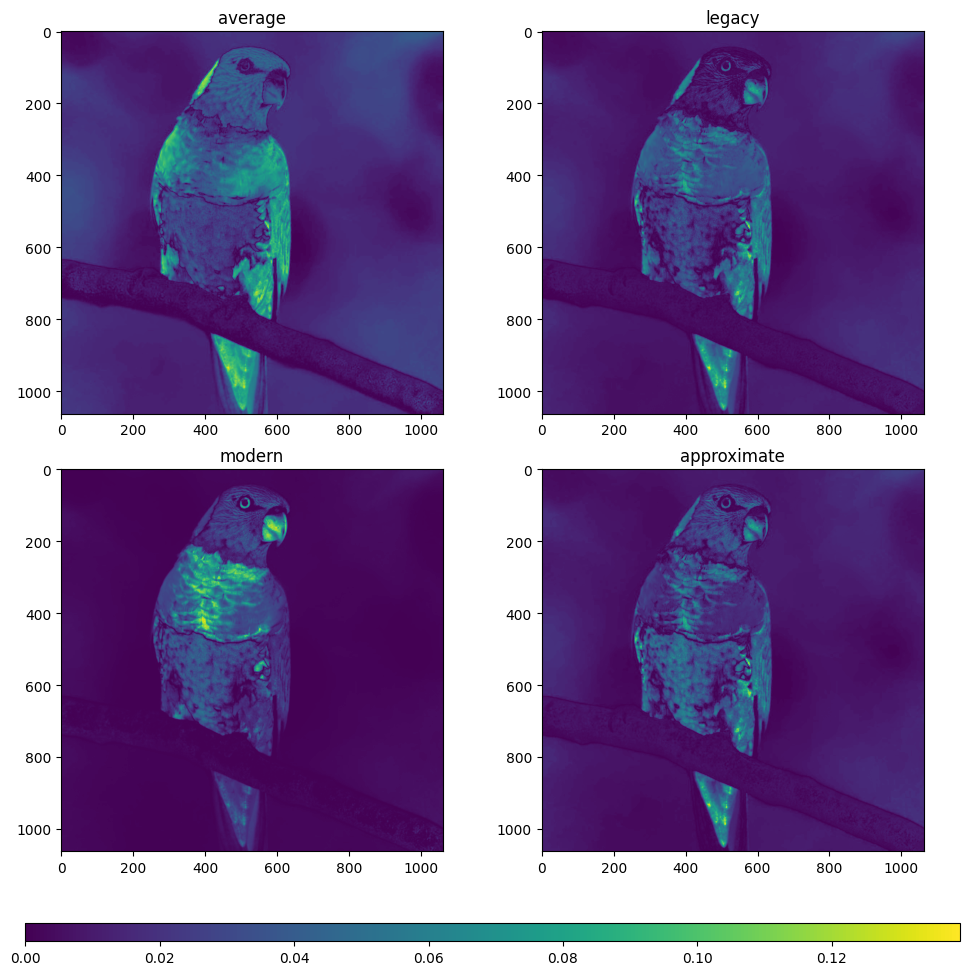

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(9.6, 9.6))
for ax, method in zip(axes.flat, ('average', 'legacy', 'modern', 'approximate')):
    im = ax.imshow(np.abs(grays[method] - grays['exact']));
    ax.set_title(method)
fig.colorbar(im, ax=axes, orientation='horizontal', aspect=50);

In [18]:
# On average, assuming uniform color distribution in natural images (does not hold),
# the modern conversion is the most accurate
intensities = np.linspace(0., 1., 256)
colors = np.stack(np.meshgrid(intensities, intensities, intensities), axis=3).reshape(-1, 1, 3)  # 16 M colors
exact = rgb2gray(colors, method='exact')
for method in ('average', 'legacy', 'modern', 'approximate'):
    lumas = rgb2gray(colors, method=method)
    print(method, np.mean(np.abs(lumas - exact)))

average 0.10456377785026287
legacy 0.05122391711954305
modern 0.048562812276429064
approximate 0.05052608708759164


### Example: desaturation

- We can use RGB $\rightarrow$ gray conversion to desaturate an image.
- Linearly interpolate between $Y$ and $RGB$ as
  $$
  \begin{bmatrix}
  R_{\textrm{desat}} \\
  G_{\textrm{desat}} \\
  B_{\textrm{desat}}
  \end{bmatrix}
  =
  (1 - \alpha) \cdot \begin{bmatrix}
  Y \\
  Y \\
  Y
  \end{bmatrix}
  +
  \alpha \cdot \begin{bmatrix}
  R\\
  G \\
  B
  \end{bmatrix}  
  =
  \begin{bmatrix}
  Y \\
  Y \\
  Y
  \end{bmatrix}
  +
  \alpha \cdot \begin{bmatrix}
  R - Y\\
  G - Y \\
  B - Y
  \end{bmatrix}
  $$
- The parameter $\alpha$ controls the amount of color.

In [19]:
def desaturate(rgb: np.ndarray, alpha: float = 0.5) -> np.ndarray:
    gray = rgb2gray(rgb)
    des = gray[..., None] + alpha * (rgb - gray[..., None])
    return des

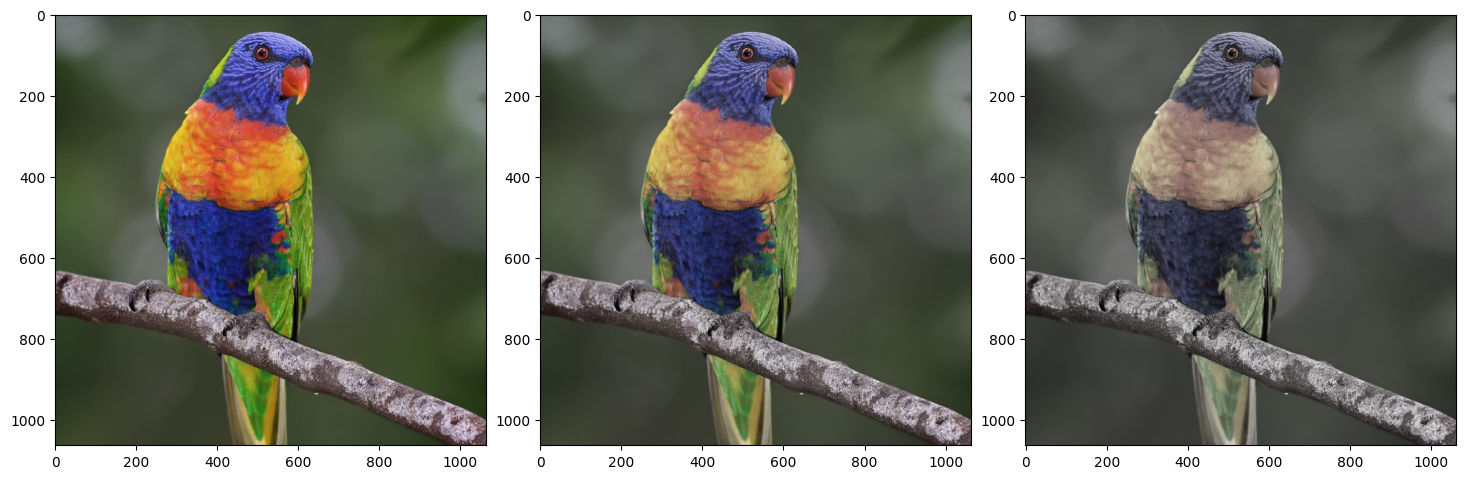

In [20]:
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.33))
axes[0].imshow(desaturate(rgb, alpha=0.8));
axes[1].imshow(desaturate(rgb, alpha=0.5));
axes[2].imshow(desaturate(rgb, alpha=0.2));

## CMY and CMYK color spaces

- When **printing** color on white paper, RGB additive color system would obviously not work, since it requires starting with black.
- Since the paper is white, color printing utilizes a **subtractive color model**, in which adding color means reducing intensity.
- Color printing requires a minimum of three primaries, most oftenly **cyan (C), magenta (M), yellow (Y)**.
- Unfortunately, yellow $Y$ is denoted by the same symbol as CIEXYZ luminance or YUV/YCbCr luma, but is unrelated to them.
- The CMY values are related to RGB as
  $$
  \begin{bmatrix}
    C \\
    M \\
    Y
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 - R \\
    1 - G \\
    1 - B
    \end{bmatrix}
  $$
- In practice, the color produced by fully saturating all three inks is not physically a true black. [Burger22]
- Therefore, the three primary colors C, M, Y are usually supplemented with a **black ink (K)** to increase the color range and gamut. [Burger22]
- Moreover, it would expensive to produce black in black and white printing using three toners instead of just one.

In [21]:
def rgb2cmy(rgb: np.ndarray) -> np.ndarray:
    return 1. - rgb

In [22]:
cmy = rgb2cmy(rgb)

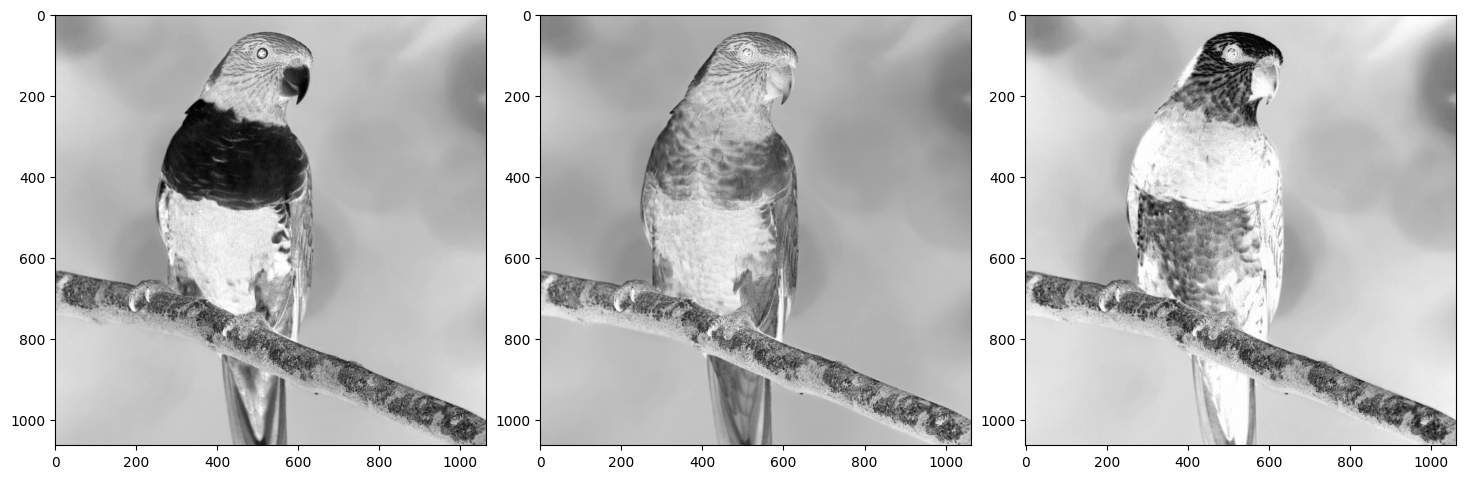

In [23]:
# Display each channel separately
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.33))
axes[0].imshow(cmy[..., 0], cmap='gray', vmin=0, vmax=1);
axes[1].imshow(cmy[..., 1], cmap='gray', vmin=0, vmax=1);
axes[2].imshow(cmy[..., 2], cmap='gray', vmin=0, vmax=1);

## YUV, YIQ and YCbCr color spaces

- Mostly used in **TVs and video systems**: YUV in PAL, YIQ in NTSC.
- The idea is to separate luma (Y) from color (UV/IQ/CbCr).
- In TV broadcast, both can be transmitted via different bandwiths.
- This allowed for backwards compatiblity with legacy black and white TVs when color broadcast launched.
- Separating luma and chroma is also useful for **compression**.

<figure class="image">
  <img src="../figures/color_images-cbcr.png" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    CbCr plane at constant luma Y' = 0.5.
    Source: <a href=https://en.wikipedia.org/wiki/YCbCr>Wikipedia</a>
  </figcaption>
</figure>

**RGB $\rightarrow$ YUV (BT.470)**

- Transformation from RGB has two steps
  1. Compute luma/luminance component $Y$ as per legacy RGB $\rightarrow$ gray conversion
     $$
     Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
     $$
  2. Compute the $U$ and $V$ components as a weighted difference between the luminance and the red and blue, respectively, i.e.
     $$
     U = 0.492 \cdot (B - Y) \qquad V = 0.877 \cdot (R - Y)
     $$

- It may be written as one vector equation, i.e.
  $$
  \begin{bmatrix}
     Y \\
     U \\
     V
  \end{bmatrix}
  =
  \begin{bmatrix}
      0.299 &  0.587 &  0.114 \\
     -0.147 & -0.289 &  0.436 \\
      0.615 & -0.515 & -0.100
  \end{bmatrix}
  \cdot
  \begin{bmatrix}
     R \\
     G \\
     B
  \end{bmatrix}
  $$

**YUV $\rightarrow$ RGB (BT.470)**

- Conversion back involves inverting the RGB $\rightarrow$ YUV matrix, i.e.
  $$
  \begin{bmatrix}
     R \\
     G \\
     B
  \end{bmatrix}
  =
  \begin{bmatrix}
     1.000 &  0.000 &  1.140 \\
     1.000 & -0.395 & -0.581 \\
     1.000 &  2.032 &  0.000
  \end{bmatrix}
  \cdot
  \begin{bmatrix}
     Y \\
     U \\
     V
  \end{bmatrix}
  $$

**YUV $\rightarrow$ YIQ**

- YIQ Originally used in NSTC.
- I denotes "in-phase" and Q denotes "quadrature".
- Modified YUV to optimize bandwith requirements.
- Mathematically, it is a rotation and mirroring
  $$
  \begin{bmatrix}
     I \\
     Q
  \end{bmatrix}
  =
  \begin{bmatrix}
     0 & 1 \\
     1 & 0 \\
  \end{bmatrix}
  \cdot
  \begin{bmatrix}
     \cos\theta & sin\theta \\
     -\sin\theta & \cos\theta \\
  \end{bmatrix}
  \cdot
  \begin{bmatrix}
     U \\
     V
  \end{bmatrix}
  $$

**RGB $\rightarrow$ YCbCr**

- YCbCr is an internationally standardized version of YUV.
- Similar two-step conversion as RGB $\rightarrow$ YUV (BT.470).
- The difference is that here the weights are not fixed, but rather left to specification by ITU BT.xxx standards.
  1. Compute luma/luminance component $Y$ as
     $$
     Y = w_\textrm{R} \cdot R + (1 - w_\textrm{R} - w_\textrm{B}) \cdot G + w_\textrm{B} \cdot B
     $$
  2. Compute the $C_\textrm{b}$ and $C_\textrm{r}$ components as a weighted difference between the luminance and the red and blue, respectively, i.e.
     $$
     C_\textrm{b} = \frac{0.5}{1 - w_\textrm{B}} \cdot (B - Y) \qquad C_\textrm{r} = \frac{0.5}{1 - w_\textrm{R}} \cdot (R - Y)
     $$
- For example,
  - with BT.601 the weights are $w_\textrm{R} = 0.299$ and $w_\textrm{B} = 0.114$,
  - while in BT.709 $w_\textrm{R} = 0.2125$ and $w_\textrm{B} = 0.0721$.
- The exact form of conversion depends also on whether the signals are in range $[0, 1]$ or $[0, 255]$.
- Moreover, the gamut of YCbCr space is smaller than that of RGB and the conversion can produce invalid values.
- See details on [Wikipedia](https://en.wikipedia.org/wiki/YCbCr).

In [24]:
def rgb2ycbcr(rgb: np.ndarray, w_r: float = 0.299, w_b: float = 0.114) -> np.ndarray:
    w_g = 1 - w_r - w_b
    w_cb = 0.5 / (1 - w_b)
    w_cr = 0.5 / (1 - w_r)
    mat = np.array([
        [w_r, w_g, w_b],
        [-w_cb * w_r, -w_cb * w_g, (w_cb - w_cb * w_b)],
        [(w_cr - w_cr * w_r), -w_cr * w_g, -w_cr * w_b]
    ])
    ybr = mat[None, None, ...] @ rgb[..., None]
    ybr = ybr.squeeze()
    ybr[..., [1, 2]] += 0.5  # shift to positive values only
    return ybr

In [25]:
ybr = rgb2ycbcr(rgb, w_r=0.2126, w_b=0.0722)
ybr.shape, ybr.dtype, ybr.min(), ybr.max()

((1063, 1063, 3), dtype('float64'), 0.0005662745098039216, 0.9960627450980392)

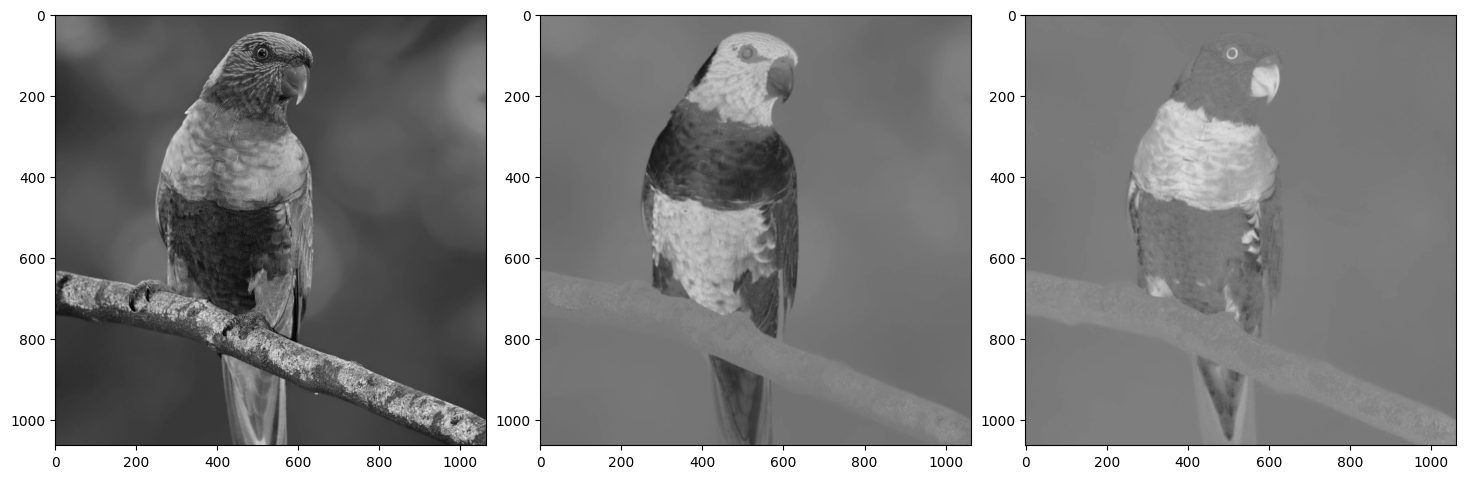

In [26]:
# Display each channel separately
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.33))
axes[0].imshow(ybr[..., 0], cmap='gray', vmin=0, vmax=1);
axes[1].imshow(ybr[..., 1], cmap='gray', vmin=0, vmax=1);
axes[2].imshow(ybr[..., 2], cmap='gray', vmin=0, vmax=1);

## HSV/HSB and HLS color spaces

- Similarly to YCbCr, HSV also separates brightness and color, but it does so in a different way.
- **HSV/HSB** uses the following three components:
  1. **hue (H)**, which identifies the color itself,
  2. **saturation (S)**, which quantifies how "strong" the color is; fully saturated color has value $V = 1$, 
  3. **value (V)** or **brightness (B)**, which corresponds to luminance, i.e. how bright or dark the color is.
- **HLS** uses
  1. **hue (H)**, which is the same as HSV hue,
  2. **lightness (L)**, which again corresponds to luminance, but $L = 1$ always means white,
  3. **saturation (S)**, again very similar to HSV, but fully satured color has $L = 0.5$.
- Advantage of this type of component separation is its intuitiveness, i.e. one can
  - pick color on one axis (i.e. from a palette),
  - and then select its brightness and saturation.
- Therefore HSV/HLS are often seen e.g. in graphics editting and design applications.
- HSV is traditionally shown either as an cylinder or a cone.

<figure class="image">
  <img src="../figures/color_images-hsl_hsv_models.svg" alt="" style="width: 6.4in; background: white"/>
  <figcaption>
    HSL and HSV models.
    Source: <a href=https://en.wikipedia.org/wiki/HSL_and_HSV>Wikipedia</a>
  </figcaption>
</figure>

- Since the conversion RGB $\rightarrow$ gray is more involved, we're going to use the skimage implementation.

In [27]:
hsv = skimage.color.rgb2hsv(rgb)
hsv.shape, hsv.dtype, hsv.min(), hsv.max()

((1063, 1063, 3), dtype('float64'), 0.0, 1.0)

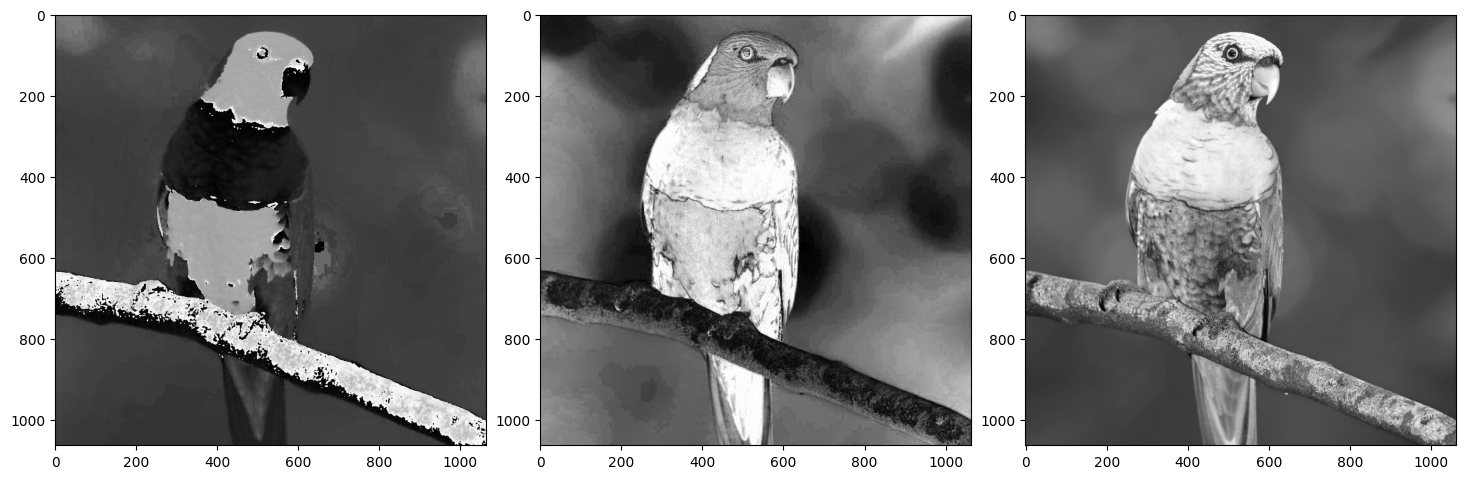

In [28]:
# Display each channel separately
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.33))
axes[0].imshow(hsv[..., 0], cmap='gray', vmin=0, vmax=1);
axes[1].imshow(hsv[..., 1], cmap='gray', vmin=0, vmax=1);
axes[2].imshow(hsv[..., 2], cmap='gray', vmin=0, vmax=1);

### Example: desaturation in the HSV space

- Since one of the components in HSV explicitly quantifies saturation, desaturation is straightforward.
- Multiply the saturation for each pixel with a value $\alpha \lt 1$
  $$
  \begin{bmatrix}
  H_{\textrm{desat}} \\
  S_{\textrm{desat}} \\
  V_{\textrm{desat}}
  \end{bmatrix}
  =
  \begin{bmatrix}
  H \\
  \alpha \cdot S \\
  V
  \end{bmatrix}
  $$

In [29]:
def desaturate_in_hsv(rgb: np.ndarray, alpha: float = 0.5) -> np.ndarray:
    hsv = skimage.color.rgb2hsv(rgb)
    hsv[..., 1] *= alpha
    des = skimage.color.hsv2rgb(hsv)
    return des

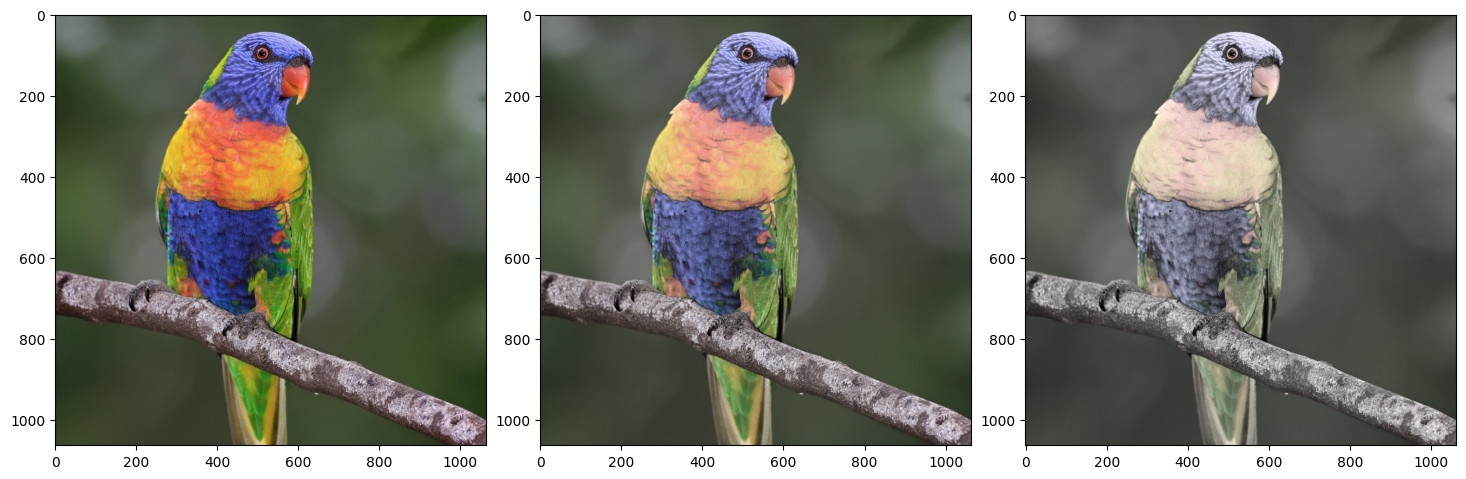

In [30]:
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.33))
axes[0].imshow(desaturate_in_hsv(rgb, alpha=0.8));
axes[1].imshow(desaturate_in_hsv(rgb, alpha=0.5));
axes[2].imshow(desaturate_in_hsv(rgb, alpha=0.2));

# CamShift